In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import shap

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


We start out by loading our data as a pandas dataframe, we like those

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

Now we verify the shape of the data

In [3]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


As we had expected, the testing dataset contains 2 columns less:
    Truth and
    p_truth_E

In [4]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 
                 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 
                 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 
                 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 
                 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster',
                 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 
                 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 
                 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 
                 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 
                 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 
                 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 
                 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 
                 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 
                 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 
                 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 
                 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 
                 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 
                 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 
                 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 
                 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 
                 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 
                 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 
                 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 
                 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 
                 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 
                 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 
                 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 
                 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 
                 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 
                 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 
                 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 
                 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 
                 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 
                 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 
                 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 
                 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 
                 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 
                 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 
                 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

We now divide our data into data(x) and labels(y):

In [5]:
X = train[all_variables]
y = train['Truth']

Then we split the data into a training and a test dataset:

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X_train_shap = xgb.DMatrix(X_train, label = y_train)

X_valid_shap = xgb.DMatrix(X_valid, label = y_valid)

In [8]:
X_test = test[all_variables]

X_test_shap = xgb.DMatrix(X_test) #first we cheat and use the validation to test that it works
#but we're gonna run it on the test data after

I guess its time to XGBoost this bitch

In [9]:
# Fit the model to the training data
params = {"objective":"binary:logistic","learning_rate": 1, "max_depth":15}

model = xgb.train(params=params, dtrain=X_train_shap,  evals=[(X_train_shap,'Train'),(X_valid_shap,'Validation')])#eval_metric='logloss', n_estimators=300, seed=42, use_label_encoder=False) 

[14:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	Train-logloss:0.20232	Validation-logloss:0.25521
[1]	Train-logloss:0.11095	Validation-logloss:0.20736
[2]	Train-logloss:0.07299	Validation-logloss:0.19812
[3]	Train-logloss:0.05243	Validation-logloss:0.19696
[4]	Train-logloss:0.04001	Validation-logloss:0.20011
[5]	Train-logloss:0.02921	Validation-logloss:0.20696
[6]	Train-logloss:0.02202	Validation-logloss:0.20962
[7]	Train-logloss:0.01770	Validation-logloss:0.21129
[8]	Train-logloss:0.01467	Validation-logloss:0.21355
[9]	Train-logloss:0.01237	Validation-logloss:0.21602


And theeeeeen, we make it predict on our data:

In [10]:
#make predictions
y_pred = model.predict(X_test_shap)

predictions = pd.DataFrame(y_pred)

## We do a new thing now, where we with shap found out which 25 variables are most important, and just run it again real quick with only those and then that is the result

In [11]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

Now we visualise which variables are most useful, we get 20:

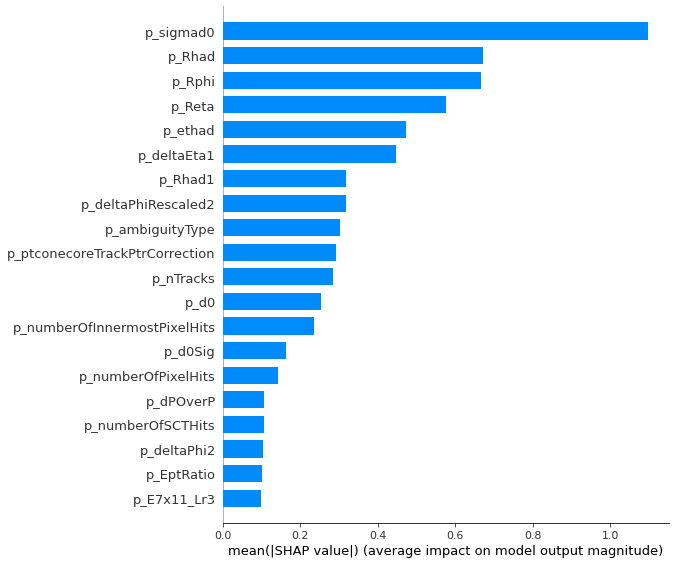

In [12]:
shap.summary_plot(shap_values, X_train,plot_type='bar')

We not make a new variable list and run our data again to get our final versions of everything:

In [13]:
shap_variables = ['p_sigmad0', 'p_Rhad', 'p_Rphi', 'p_Reta', 'p_ethad', 'p_deltaEta1', 'p_Rhad1', 'p_deltaPhiRescaled2', 'p_ambiguityType', 
                  'p_ptconecoreTrackPtrCorrection', 'p_nTracks', 'p_d0', 'p_numberOfInnermostPixelHits', 'p_d0Sig', 'p_numberOfPixelHits']

In [14]:
X_fin = train[shap_variables]
y_fin = train['Truth']

In [15]:
X_train_fin, X_valid_fin, y_train_fin, y_valid_fin = train_test_split(X_fin, y_fin, test_size=0.33, random_state=42)

In [16]:
X_train_shap_fin = xgb.DMatrix(X_train_fin, label = y_train_fin)

X_valid_shap_fin = xgb.DMatrix(X_valid_fin, label = y_valid_fin)

In [17]:
X_test_fin = test[shap_variables]

X_test_shap_fin = xgb.DMatrix(X_test_fin)

Now we play around with the fitting and the parameters:

In [18]:
params_fin = {"objective":"binary:logistic","learning_rate": 0.01, "max_depth":7, 'alpha': 3, 'colsample_bytree': 0.5, 'eval_metric': 'logloss',
             'seed': 42}

number_of_boost = 100000
early_stopping = 50
verb_evals = 20

model_fin = xgb.train(params=params_fin, dtrain=X_train_shap_fin,  evals=[(X_train_shap_fin,'Train'),(X_valid_shap_fin,'Validation')], 
                      num_boost_round = number_of_boost, early_stopping_rounds = early_stopping, verbose_eval = verb_evals)

[0]	Train-logloss:0.68552	Validation-logloss:0.68562
[20]	Train-logloss:0.55857	Validation-logloss:0.56036
[40]	Train-logloss:0.46827	Validation-logloss:0.47145
[60]	Train-logloss:0.40047	Validation-logloss:0.40481
[80]	Train-logloss:0.34925	Validation-logloss:0.35462
[100]	Train-logloss:0.30904	Validation-logloss:0.31538
[120]	Train-logloss:0.27796	Validation-logloss:0.28514
[140]	Train-logloss:0.25307	Validation-logloss:0.26102
[160]	Train-logloss:0.23325	Validation-logloss:0.24195
[180]	Train-logloss:0.21737	Validation-logloss:0.22670
[200]	Train-logloss:0.20439	Validation-logloss:0.21436
[220]	Train-logloss:0.19377	Validation-logloss:0.20435
[240]	Train-logloss:0.18519	Validation-logloss:0.19638
[260]	Train-logloss:0.17814	Validation-logloss:0.18987
[280]	Train-logloss:0.17210	Validation-logloss:0.18439
[300]	Train-logloss:0.16718	Validation-logloss:0.18000
[320]	Train-logloss:0.16309	Validation-logloss:0.17642
[340]	Train-logloss:0.15969	Validation-logloss:0.17347
[360]	Train-logl

We make it predict our values and put them back in a pandas dataframe and save it to the required txt file:

In [19]:
y_pred_fin = model_fin.predict(X_test_shap_fin)# don't use: , output_margin = True), it fucks up the output

predictions_fin = pd.DataFrame(y_pred_fin)

predictions_fin.to_csv('Classification_MajaSkafsgaard_XGBoostClassifier.txt', sep = ',', header = None, index = True, mode = 'a')

In [20]:
predictions_fin

,0
0,0.992337
1,0.952015
2,0.961709
3,0.996724
4,0.070860
...,...
160646,0.810401
160647,0.233531
160648,0.079320
160649,0.011140


# The regression part starts now:

In [21]:
X_reg = train[all_variables]
y_reg = train['p_truth_E']

In [22]:
X_train_reg, X_valid_reg, y_train_reg, y_valid_reg = train_test_split(X_reg, y_reg, test_size=0.33, random_state=42)

In [23]:
X_train_shap_reg = xgb.DMatrix(X_train_reg, label = y_train_reg)

X_valid_shap_reg = xgb.DMatrix(X_valid_reg, label = y_valid_reg)

In [25]:
xgbReg = xgb.XGBRegressor( )#n_estimators = 100, max_depth = 5, learning_rate = 1, verbosity = 1, colsample_bytree = 0.5)
xgbReg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
shap.initjs()
explainerreg = shap.TreeExplainer(xgbReg)
shap_values_reg = explainerreg.shap_values(X_train_reg)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


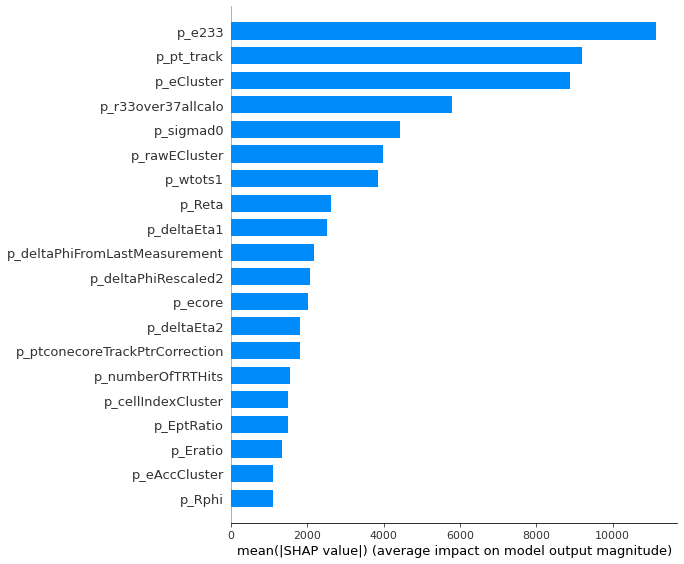

In [27]:
shap.summary_plot(shap_values_reg, X_train_reg, plot_type='bar')

In [30]:
shaperoos_reg = ['p_e233', 'p_pt_track', 'p_eCluster', 'p_r33over37allcalo', 'p_sigmad0', 'p_rawECluster', 'p_wtots1', 'p_Reta', 
                 'p_deltaEta1', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled2', 'p_ecore', 'p_deltaEta2', 
                 'p_ptconecoreTrackPtrCorrection', 'p_numberOfTRTHits']

15


In [29]:
predictaddg = xgbReg.predict(X_valid_reg[shap_variables])

ValueError: Feature shape mismatch, expected: 160, got 53625

In [31]:
X_train_shaperoos = X_train_shap_reg[shaperoos_reg]

X_valid_shaperoos = X_valid_shap_reg

TypeError: 'DMatrix' object is not subscriptable

In [ ]:
X_test_reg = test[shaperoos_regroos_reg]

X_test_shap_reg = xgb.DMatrix(X_test_fin)